#### Import libraries and set visualization options

In [3]:
# Import libraries
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Set visualization options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

#### Create analysis folders

In [9]:
# Define function for creating analysis folders
def create_analysis_folder(operating_system, project_name, analysis_name):
	
	# Set path to BSC folder for mac, linux and windows
	if operating_system == 'windows':
		pathToBSCfolder = 'Z:\\'
	elif operating_system == 'linux':
		pathToBSCfolder = os.path.join('/home','amontaner','BSC')
	elif operating_system == 'mac':
		pathToBSCfolder = os.path.join('/Users','annamontaner','Documents','BSC3')
	else:
		print ('undefined operating system') 
	
	# Path to project folder 
	project_folder = os.path.join('scratch','cli79','cli79334','projects', 'other', project_name)


   # Create analysis folder and subfolders 
	analysis_folder = os.path.join(pathToBSCfolder, project_folder, analysis_name)
	analysis_info_folder = os.path.join(analysis_folder,'analysis_info')
	intermediate_folder = os.path.join(analysis_folder,'intermediate_files')
	assets_folder = os.path.join(analysis_folder,'assets')
	final_folder = os.path.join(analysis_folder,'final_files')


	folder_list = [analysis_folder,
				   analysis_info_folder, 
				   assets_folder, 
				   intermediate_folder, 
				   final_folder]

	if not os.path.exists(analysis_folder):
		for items in folder_list:
			os.makedirs(items)
		print("Analysis folder and subfolders created '{}' created".format(analysis_name))
	else: 
		print("Already existing analysis '{}' ".format(analysis_name))

	return(analysis_folder)

In [12]:
# Create analysis folders
analysis_folder = create_analysis_folder('mac','1kGPhg38', '1kGPhg38_african_variants')	

Already existing analysis '1kGPhg38_african_variants' 


#### Import data

In [13]:
# Define function
def import_annotated_data(annotation_folder, tsvFile):
  
       
    # Import data
    data = pd.read_csv(os.path.join(annotation_folder, tsvFile), sep='\t', low_memory=False)
    
    # Data types conversion: AQUÍ CALDRÀ AFEGIR QUE PER A hg38 HEM DE CONVERTIR LA COLUMNA DELS 1000GENOMES hg38
    colsToConvert = ['AF','AC','NS','AN','EAS_AF','EUR_AF','AFR_AF','AMR_AF','SAS_AF', 'dbNSFP_1000Gp3_AF', 'dbNSFP_1000Gp3_EUR_AF', 'dbNSFP_1000Gp3_AFR_AF', 'dbNSFP_1000Gp3_AMR_AF', 'dbNSFP_1000Gp3_EAS_AF', 'dbNSFP_1000Gp3_SAS_AF', 'dbNSFP_ESP6500_EA_AF', 'dbNSFP_ESP6500_AA_AF', 'dbNSFP_ExAC_AF', 'dbNSFP_ExAC_NFE_AF', 'dbNSFP_ExAC_AFR_AF', 'dbNSFP_ExAC_AMR_AF', 'dbNSFP_ExAC_EAS_AF', 'dbNSFP_ExAC_FIN_AF', 'dbNSFP_ExAC_SAS_AF', 'dbNSFP_ExAC_Adj_AF', 'dbNSFP_gnomAD_exomes_AF', 'dbNSFP_gnomAD_exomes_NFE_AF', 'dbNSFP_gnomAD_genomes_AF', 'dbNSFP_gnomAD_genomes_NFE_AF']
    data[colsToConvert] = data[colsToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    return(data)

In [14]:
# Import 1kGPhg38 snpEff annotated and biotype filtered data
d = import_annotated_data(analysis_folder,'subset_snvs_protein_coding_1kGPhg38.tsv')

In [15]:
data = d.copy()

#### Group by different annotation categories

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


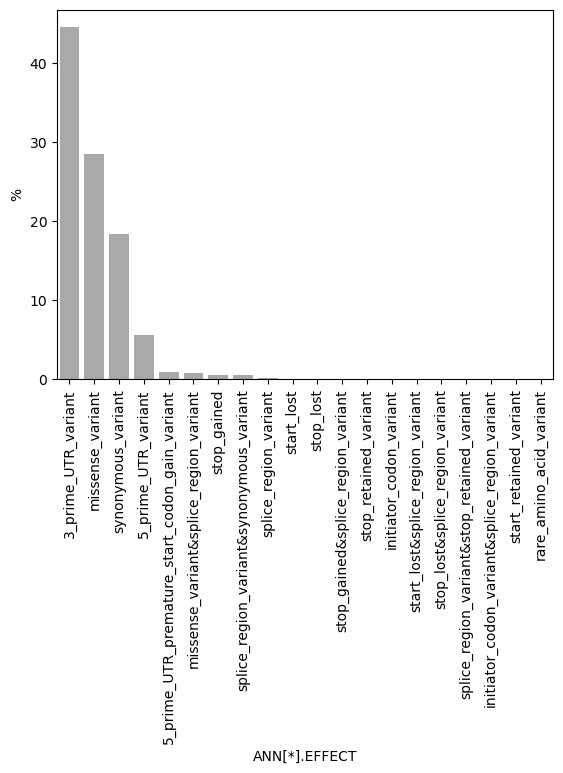

In [9]:
# Group by ANN[*].EFFECTS
group = data.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
group.to_csv(os.path.join(analysis_folder,'assets','annotated_effects_1kGPhg38.tsv'), index=False)


sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'darkgray')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].EFFECT")
plt.ylabel("%")

plt.savefig(os.path.join(analysis_folder,'assets','annotated_effects_1kGPhg38.pdf'), dpi=300)
plt.show()

In [36]:
data['AF'].quantile(0.965)

0.18

In [37]:
data['AFR_AF'].quantile(0.963)

0.18

In [ ]:
data

#### Histogram of the initial dataset

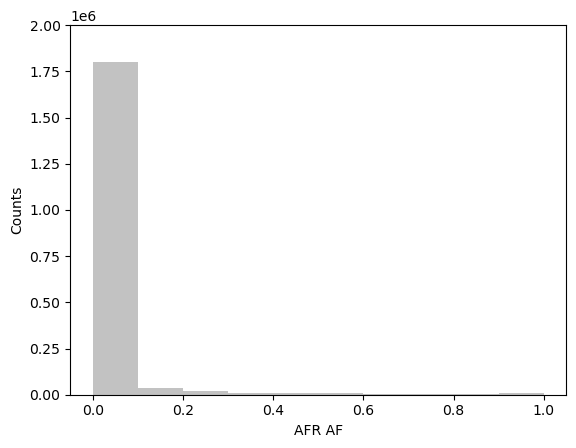

In [38]:

# Freq histogram full dataset for each value X 
plt.hist(data['AFR_AF'], bins=10, color='darkgray', alpha=0.7)

plt.ylim(0,2000000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('1kGPhg38')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 1900000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(data.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

#### Add label: African abundant / not abundant label

In [39]:
# Abundant in Africa: AFR_AF >= 0.18 
abundantAFR = ['abundant' if x>=0.18 else 'not_abundant' for x in data['AFR_AF']]
data = data.assign(abundantAFR_label = abundantAFR)

#### Add label: African specificity (overrepresentation)

In [40]:
# Calculate maximum freq
alleleFreqs = ['EAS_AF','EUR_AF','AMR_AF','SAS_AF']
data['maxFreqs'] = data[alleleFreqs].max(axis=1)
data['AFR_overrepresentation'] = data['AFR_AF'].divide(data['maxFreqs'])

# Replace nan values by 0 (Ex. AF_AFR = 0 and maxFreqs = 0)
data['AFR_overrepresentation_mod'] = data['AFR_overrepresentation'].replace({np.nan:0, np.inf:50})

# Convert to discrete number
AFR_overrepresentation_label0 = [round(x) for x in data['AFR_overrepresentation_mod']]

# Add label
data = data.assign(AFR_overrepresentation_label = AFR_overrepresentation_label0)

In [41]:
data[data['abundantAFR_label']=='abundant'].shape[0]

71736

In [42]:
# Visualization of results
data[['AFR_AF','maxFreqs','abundantAFR_label','AFR_overrepresentation','AFR_overrepresentation_label']]

AFR_AF  maxFreqs abundantAFR_label  AFR_overrepresentation  \
0          0.65      1.00          abundant                    0.65   
1          0.00      0.00      not_abundant                     NaN   
2          0.00      0.00      not_abundant                     NaN   
3          0.00      0.00      not_abundant                     NaN   
4          0.00      0.00      not_abundant                     NaN   
...         ...       ...               ...                     ...   
1905484    0.00      0.00      not_abundant                     NaN   
1905485    0.00      0.00      not_abundant                     NaN   
1905486    0.02      0.00      not_abundant                     inf   
1905487    0.00      0.00      not_abundant                     NaN   
1905488    0.02      0.01      not_abundant                    2.00   

         AFR_overrepresentation_label  
0                                   1  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                               ...  
1905484                             0  
1905485                             0  
1905486                            50  
1905487                             0  
1905488                             2  

[1905489 rows x 5 columns]

#### Build label: Found in Fedorova AFR ARSAs or not

In [5]:
# Import Fedorova data
ARSAfedorova = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/AFR_ARSA_FedorovaL/02_snpEff_annotation/results/20231118_162248_pipeline_bam_targetVariantCallingRed_Fedorova_test1/mutations_Fedorova_test1.tsv', sep="\t")
ARSAfedorova.shape[0]

/var/folders/kt/qf89bw917mg3nhrtrkj4_lmc0000gn/T/ipykernel_1313/4193043263.py:2: DtypeWarning: Columns (137,139) have mixed types. Specify dtype option on import or set low_memory=False.
  ARSAfedorova = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/AFR_ARSA_FedorovaL/02_snpEff_annotation/results/20231118_162248_pipeline_bam_targetVariantCallingRed_Fedorova_test1/mutations_Fedorova_test1.tsv', sep="\t")


In [43]:
# Add Fedorova label. Attention! Doing this is faster than list comprehension or generator expression although a new dataframe has to be generated.
fedorova = data[data['ID'].isin(ARSAfedorova['ID'])]
not_fedorova = data[~data['ID'].isin(ARSAfedorova['ID'])]

fedorova = fedorova.assign(fedorova_label = 'AFR_ARSA_Fedorova')
not_fedorova = not_fedorova.assign(fedorova_label = 'Not_AFR_ARSA_Fedorova')

data2 = pd.concat([fedorova, not_fedorova])

In [31]:
len(set(ARSAfedorova[(ARSAfedorova['ANN[*].BIOTYPE']=='protein_coding')& (ARSAfedorova['ANN[*].EFFECT']!='intron_variant') & (ARSAfedorova['ANN[*].EFFECT']!='upstream_gene_variant')&(ARSAfedorova['ANN[*].EFFECT']!='downstream_gene_variant')]['ID']))

1443

In [24]:
len(set(fedorova['ID']))

1393

In [21]:
set(fedorova['ID']) - set(ARSAfedorova['ID'])

set()

#### Explore common variants between Fedorova and 1kGPhg38

In [45]:
fedorova_common = data2[data2['ID'].isin(ARSAfedorova['ID'])]
fedorova_common.shape[0]

1425

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


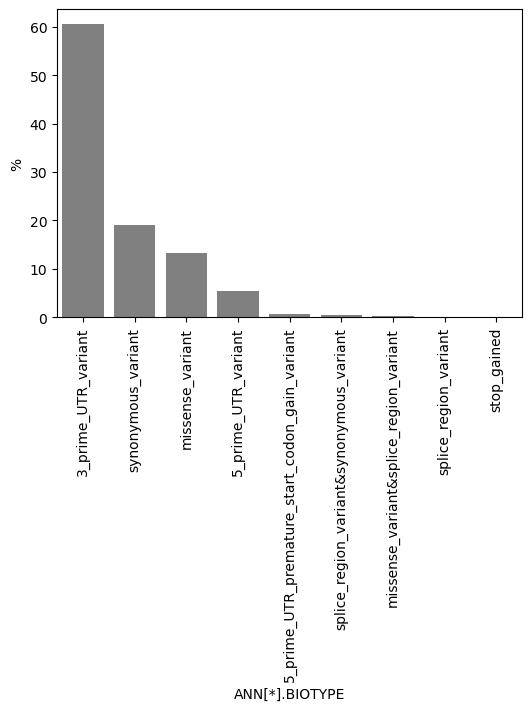

In [46]:
group =fedorova_common.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
#group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'grey')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

#plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

In [47]:
# Data visualization
data2[['AFR_AF','maxFreqs','abundantAFR_label','AFR_overrepresentation','AFR_overrepresentation_label','fedorova_label']]

AFR_AF  maxFreqs abundantAFR_label  AFR_overrepresentation  \
2019       0.23      0.01          abundant                    23.0   
7250       0.30      0.03          abundant                    10.0   
7266       0.30      0.03          abundant                    10.0   
7279       0.30      0.03          abundant                    10.0   
7624       0.25      0.02          abundant                    12.5   
...         ...       ...               ...                     ...   
1905484    0.00      0.00      not_abundant                     NaN   
1905485    0.00      0.00      not_abundant                     NaN   
1905486    0.02      0.00      not_abundant                     inf   
1905487    0.00      0.00      not_abundant                     NaN   
1905488    0.02      0.01      not_abundant                     2.0   

         AFR_overrepresentation_label         fedorova_label  
2019                               23      AFR_ARSA_Fedorova  
7250                               10      AFR_ARSA_Fedorova  
7266                               10      AFR_ARSA_Fedorova  
7279                               10      AFR_ARSA_Fedorova  
7624                               12      AFR_ARSA_Fedorova  
...                               ...                    ...  
1905484                             0  Not_AFR_ARSA_Fedorova  
1905485                             0  Not_AFR_ARSA_Fedorova  
1905486                            50  Not_AFR_ARSA_Fedorova  
1905487                             0  Not_AFR_ARSA_Fedorova  
1905488                             2  Not_AFR_ARSA_Fedorova  

[1905489 rows x 6 columns]

#### Build label: ADME gene or not

In [48]:
# Import pharmGKB ADME gene list
pharmGKB_ADME = pd.read_csv('/Users/annamontaner/Documents/BSC3/scratch/cli79/cli79334/projects/other/pharmGKB_ADME_genes/adme_gene_list.tsv',sep='\t')

In [49]:
pharmGKB_ADME.shape[0]

284

In [50]:
# Check how many of the genes in the pharmGKB list DO NOT overlap with the genes found within the 1kGPhg38 data
set(pharmGKB_ADME['Gene Symbol']) - set(data2['ANN[*].GENE'])


{'ABCB7',
 'ABCC13',
 'CHST7',
 'CYP2D6',
 'CYP2D7',
 'DHRS4L1',
 'FMO6P',
 'GSTT1',
 'GSTT2',
 'LOC731356',
 'MAOA',
 'PLGLB1',
 'SLC22A18AS',
 'SULT1A3',
 'SULT1C1'}

In [51]:
# Add ADME label
ADME = data2[data2['ANN[*].GENE'].isin(pharmGKB_ADME['Gene Symbol'])]
not_ADME = data2[~data2['ANN[*].GENE'].isin(pharmGKB_ADME['Gene Symbol'])]

ADME = ADME.assign(ADME_label = 'ADME')
not_ADME = not_ADME.assign(ADME_label = 'Not_ADME')

data3 = pd.concat([ADME, not_ADME])

In [24]:
data3

SAMPLE CHROM        POS REF ALT ANN[*].GENE    ANN[*].GENEID  \
212667    chr2     2   31375473   G   C         XDH  ENSG00000158125   
307173    chr2     2  218809759   G   A     CYP27A1  ENSG00000135929   
427753    chr3     3  183978599   G   A       ABCC5  ENSG00000114770   
707545    chr6     6  160452332   C   T     SLC22A3  ENSG00000146477   
916025    chr9     9  104816197   C   T       ABCA1  ENSG00000165029   
...        ...   ...        ...  ..  ..         ...              ...   
1905484   chrX     X  156025329   G   A      WASH6P  ENSG00000182484   
1905485   chrX     X  156025330   C   T      WASH6P  ENSG00000182484   
1905486   chrX     X  156025332   A   G      WASH6P  ENSG00000182484   
1905487   chrX     X  156025353   C   T      WASH6P  ENSG00000182484   
1905488   chrX     X  156025359   C   T      WASH6P  ENSG00000182484   

        ANN[*].FEATURE    ANN[*].FEATUREID  ANN[*].BIOTYPE  \
212667      transcript   ENST00000379416.4  protein_coding   
307173      transcript   ENST00000258415.9  protein_coding   
427753      transcript  ENST00000334444.11  protein_coding   
707545      transcript   ENST00000275300.3  protein_coding   
916025      transcript   ENST00000374736.8  protein_coding   
...                ...                 ...             ...   
1905484     transcript   ENST00000359512.8  protein_coding   
1905485     transcript   ENST00000359512.8  protein_coding   
1905486     transcript   ENST00000359512.8  protein_coding   
1905487     transcript   ENST00000359512.8  protein_coding   
1905488     transcript   ENST00000359512.8  protein_coding   

               ANN[*].EFFECT ANN[*].IMPACT  ANN[*].RANK ANN[*].HGVS_C  \
212667    synonymous_variant           LOW           15     c.1509C>G   
307173    synonymous_variant           LOW            2      c.438G>A   
427753    synonymous_variant           LOW            9     c.1200C>T   
707545   3_prime_UTR_variant      MODIFIER           11    c.*1276C>T   
916025    synonymous_variant           LOW           25     c.3684G>A   
...                      ...           ...          ...           ...   
1905484   synonymous_variant           LOW           10     c.1392G>A   
1905485          stop_gained          HIGH           10     c.1393C>T   
1905486   synonymous_variant           LOW           10     c.1395A>G   
1905487   synonymous_variant           LOW           10     c.1416C>T   
1905488   synonymous_variant           LOW           10     c.1422C>T   

        ANN[*].HGVS_P  ANN[*].CDNA_POS  ANN[*].CDNA_LEN  ANN[*].CDS_POS  \
212667    p.Gly503Gly             1585             5715            1509   
307173    p.Pro146Pro              474             1895             438   
427753    p.Ser400Ser             1310             5790            1200   
707545              .               -1               -1              -1   
916025   p.Arg1228Arg             3997            10408            3684   
...               ...              ...              ...             ...   
1905484   p.Pro464Pro             1392             1437            1392   
1905485     p.Gln465*             1393             1437            1393   
1905486   p.Gln465Gln             1395             1437            1395   
1905487   p.Asp472Asp             1416             1437            1416   
1905488   p.Asp474Asp             1422             1437            1422   

         ANN[*].CDS_LEN  ANN[*].AA_POS  ANN[*].AA_LEN  ANN[*].DISTANCE  \
212667             4002            503           1333                0   
307173             1596            146            531                0   
427753             4314            400           1437                0   
707545               -1             -1             -1             1276   
916025             6786           1228           2261                0   
...                 ...            ...            ...              ...   
1905484            1437            464            478                0   
1905485            1437     

In [25]:
len(set(data3[data3['ADME_label']=='ADME']['ANN[*].GENE']))

268

### Exploratory analysis

#### African abundant variants

In [52]:
abundantAFR = data3[data3['abundantAFR_label']=='abundant']
abundantAFR.shape

(71736, 151)

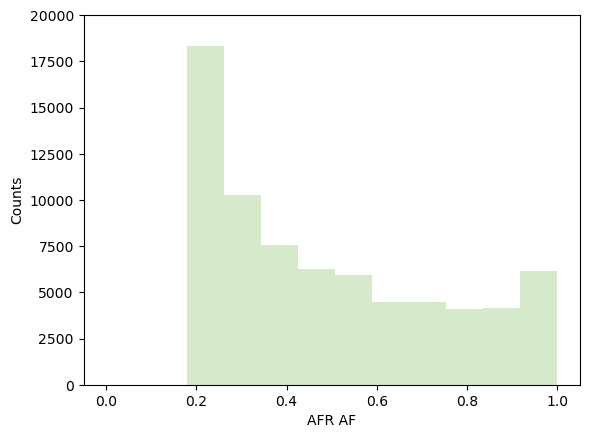

In [53]:
# Freq histogram full dataset for each value X 
plt.hist(abundantAFR['AFR_AF'], bins=10, color='#C5E0B4', alpha=0.7)

plt.ylim(0,20000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('Abundant in the African superpopulation')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 28000   # Y-coordinate for the label
label_text = "Total SNVs: " + str(abundantAFR.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')


# Display the histogram
plt.show()

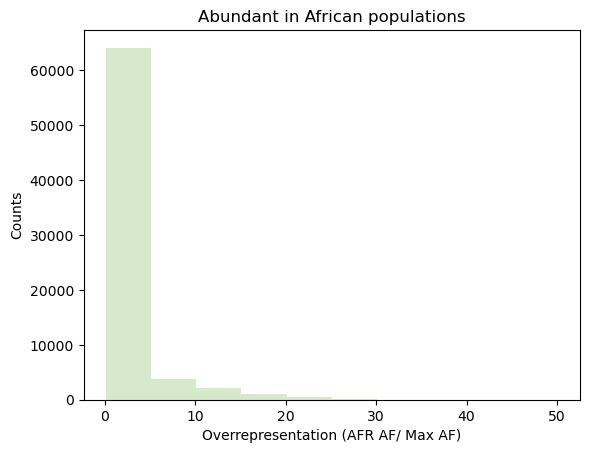

In [54]:
# Freq histogram full dataset for each value X 
plt.hist(abundantAFR['AFR_overrepresentation_mod'], bins=10, color='#C5E0B4', alpha=0.7)

#plt.ylim(0,60000)
#plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('Overrepresentation (AFR AF/ Max AF)')
plt.ylabel('Counts')
plt.title('Abundant in African populations')

# Add a label to the plot
label_x = 37  # X-coordinate for the label
label_y = 61500   # Y-coordinate for the label
label_text = "Total SNVs: " + str(abundantAFR.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

Distribution of ADME genes in African abundant variants

In [55]:
# How many ADME
len(set(abundantAFR[abundantAFR['ADME_label']=='ADME']['ANN[*].GENE']))

# How many AFR abundant variants in ADME genes
abundantAFR[abundantAFR['ADME_label']=='ADME'].shape[0]

1135

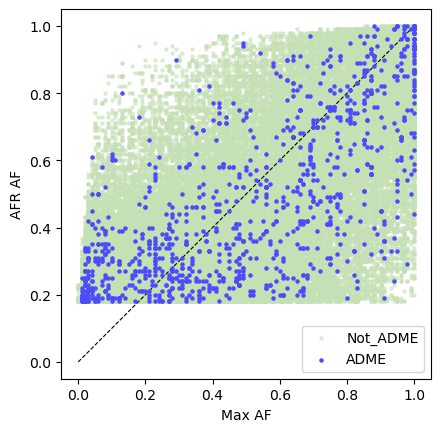

In [56]:
groups = abundantAFR.groupby('ADME_label')

# Color mapping for each group
color_mapping = {'ADME': '#4C4CFF', 'not_ADME': '#C5E0B4'}

# Plot points for 'not_ADME' group first
for name, group in groups:
    if name != 'ADME':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, '#C5E0B4')
        )

# Plot points for 'ADME' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'ADME')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='ADME',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('ADME', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in the African superpopulation')
plt.show()

Distribution of variants overlapping with Fedorova in African abundant variants

In [31]:
# How many AFR abundant variants overlapping with Fedorova variants
abundantAFR[abundantAFR['fedorova_label']=='AFR_ARSA_Fedorova'].shape[0]

1415

In [ ]:
# How many Fedorova variants
len(set(abundantAFR[abundantAFR['fedorova_label']=='AFR_ARSA_Fedorova']['ID']))

In [ ]:
set(abundantAFR['fedorova_label'])

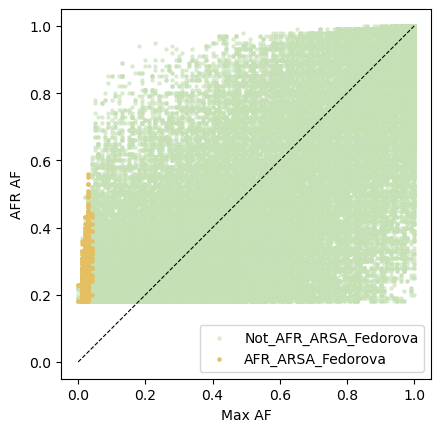

In [64]:
groups = abundantAFR.groupby('fedorova_label')

# Color mapping for each group
color_mapping = {'AFR_ARSA_Fedorova': '#E5BF62', 'not_AFR_ARSA_Fedorova': '#C5E0B4'}

# Plot points for 'not_AFR_ARSA_Fedorova' group first
for name, group in groups:
    if name != 'AFR_ARSA_Fedorova':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, '#C5E0B4')
        )

# Plot points for 'AFR_ARSA_Fedorova' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'AFR_ARSA_Fedorova')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='AFR_ARSA_Fedorova',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('AFR_ARSA_Fedorova', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Abundant in African populations')
plt.show()

#### African specific variants

In [59]:
specificAFR = abundantAFR[abundantAFR['AFR_overrepresentation_mod']>=5]
specificAFR[['CHROM','POS','REF','ALT','ANN[*].GENE','ANN[*].GENEID','ANN[*].EFFECT','ANN[*].IMPACT','ID','AF','AC','NS','AN','EAS_AF','EUR_AF','AFR_AF','AMR_AF','SAS_AF','AFR_overrepresentation_label','fedorova_label','ADME_label']]

CHROM        POS REF ALT ANN[*].GENE    ANN[*].GENEID  \
212667      2   31375473   G   C         XDH  ENSG00000158125   
307173      2  218809759   G   A     CYP27A1  ENSG00000135929   
427753      3  183978599   G   A       ABCC5  ENSG00000114770   
707545      6  160452332   C   T     SLC22A3  ENSG00000146477   
916025      9  104816197   C   T       ABCA1  ENSG00000165029   
...       ...        ...  ..  ..         ...              ...   
1904728     X    1466418   C   G       P2RY8  ENSG00000182162   
1905166     X    2487476   C   T       ZBED1  ENSG00000214717   
1905185     X    2488109   G   A       ZBED1  ENSG00000214717   
1905193     X    2488362   A   G       ZBED1  ENSG00000214717   
1905441     X  156003450   G   T        IL9R  ENSG00000124334   

                                    ANN[*].EFFECT ANN[*].IMPACT           ID  \
212667                         synonymous_variant           LOW   rs45612839   
307173                         synonymous_variant           LOW     rs692003   
427753                         synonymous_variant           LOW    rs1053386   
707545                        3_prime_UTR_variant      MODIFIER    rs1050908   
916025                         synonymous_variant           LOW    rs2230807   
...                                           ...           ...          ...   
1904728                        synonymous_variant           LOW  rs112803166   
1905166                       3_prime_UTR_variant      MODIFIER   rs58942031   
1905185                       3_prime_UTR_variant      MODIFIER    rs7057630   
1905193                       3_prime_UTR_variant      MODIFIER    rs7061377   
1905441  splice_region_variant&synonymous_variant           LOW    rs3093494   

           AF   AC    NS    AN  EAS_AF  EUR_AF  AFR_AF  AMR_AF  SAS_AF  \
212667   0.06  319  2548  5096     0.0    0.00    0.23    0.02    0.00   
307173   0.07  370  2548  5096     0.0    0.00    0.26    0.03    0.00   
427753   0.09  463  2548  5096     0.0    0.00    0.33    0.02    0.00   
707545   0.06  281  2548  5096     0.0    0.00    0.20    0.02    0.00   
916025   0.06  324  2548  5096     0.0    0.00    0.23    0.02    0.00   
...       ...  ...   ...   ...     ...     ...     ...     ...     ...   
1904728  0.08  427  2548  5096     0.0    0.01    0.29    0.02    0.01   
1905166  0.08  432  2548  5096     0.0    0.00    0.31    0.03    0.00   
1905185  0.11  565  2548  5096     0.0    0.00    0.40    0.03    0.00   
1905193  0.09  436  2548  5096     0.0    0.00    0.31    0.03    0.00   
1905441  0.05  259  2548  5096     0.0    0.00    0.18    0.02    0.00   

         AFR_overrepresentation_label         fedorova_label ADME_label  
212667                             12      AFR_ARSA_Fedorova       ADME  
307173                              9      AFR_ARSA_Fedorova       ADME  
427753                             16      AFR_ARSA_Fedorova       ADME  
707545                             10      AFR_ARSA_Fedorova       ADME  
916025                             12      AFR_ARSA_Fedorova       ADME  
...                               ...                    ...        ...  
1904728                            14  Not_AFR_ARSA_Fedorova   Not_ADME  
1905166                            10  Not_AFR_ARSA_Fedorova   Not_ADME  
1905185                            13  Not_AFR_ARSA_Fedorova   Not_ADME  
1905193                            10  Not_AFR_ARSA_Fedorova   Not_ADME  
1905441                             9  Not_AFR_ARSA_Fedorova   Not_ADME  

[7865 rows x 21 columns]

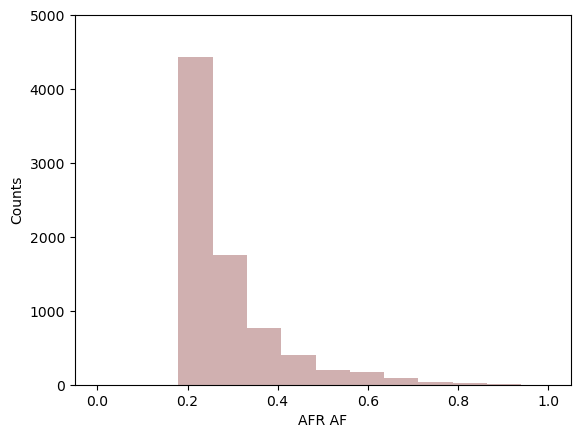

In [57]:
# Freq histogram full dataset for each value X 
plt.hist(specificAFR['AFR_AF'], bins=10, color='rosybrown', alpha=0.7)

plt.ylim(0,5000)
plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('AFR AF')
plt.ylabel('Counts')
#plt.title('Specific to African populations')

# Add a label to the plot
label_x = 0.72  # X-coordinate for the label
label_y = 4700   # Y-coordinate for the label
#label_text = "Total SNVs: " + str(specificAFR.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

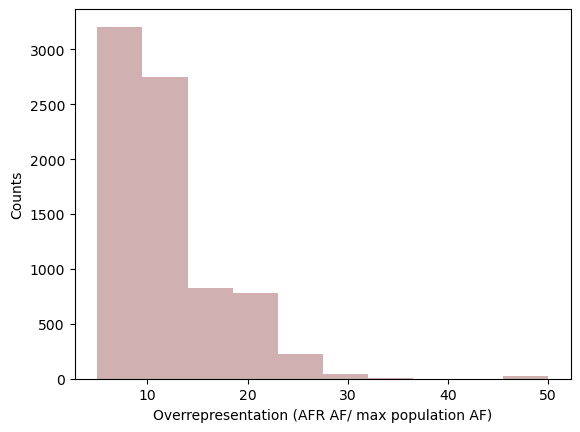

In [56]:
# Freq histogram full dataset for each value X 
plt.hist(specificAFR['AFR_overrepresentation_mod'], bins=10, color='rosybrown', alpha=0.7)

#plt.ylim(0,60000)
#plt.xlim(-0.05,1.05)

# Add labels and a title
plt.xlabel('Overrepresentation (AFR AF/ max population AF)')
plt.ylabel('Counts')
#plt.title('Specific to African populations')

# Add a label to the plot
label_x = 37  # X-coordinate for the label
label_y = 3100   # Y-coordinate for the label
#label_text = "Total SNVs: " + str(abundantAFR.shape[0])
#plt.text(label_x, label_y, label_text, fontsize=10, color='black')

# Display the histogram
plt.show()

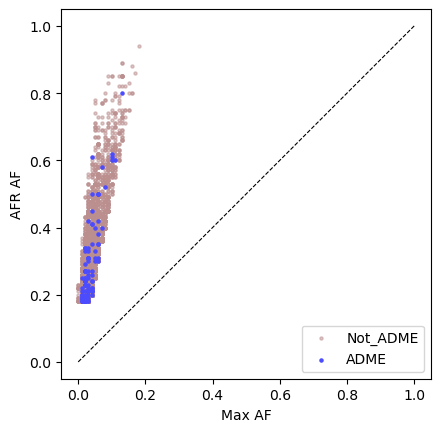

In [58]:
groups = specificAFR.groupby('ADME_label')

# Color mapping for each group
color_mapping = {'ADME': '#4C4CFF', 'not_ADME': 'rosybrown'}

# Plot points for 'not_ADME' group first
for name, group in groups:
    if name != 'ADME':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'rosybrown')
        )

# Plot points for 'ADME' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'ADME')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='ADME',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('ADME', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Specific to African populations')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniforge/base/envs/ersilia/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


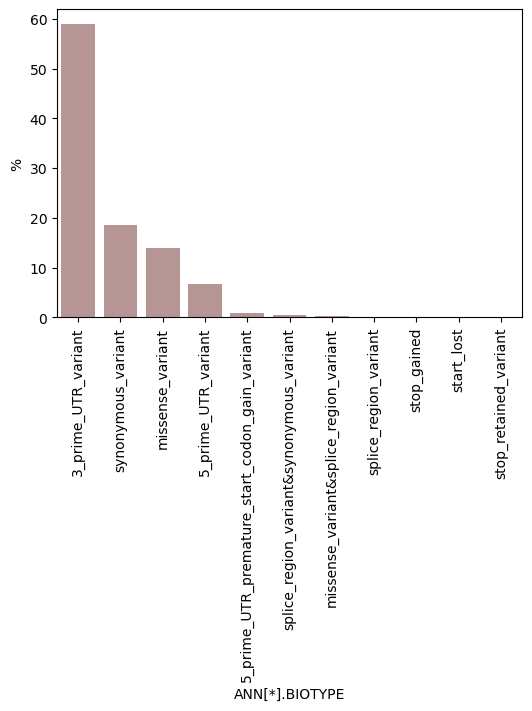

In [90]:
# Annotated effects in AFR specific variants

group =specificAFR.groupby(['ANN[*].EFFECT']).size().reset_index(name='count')

# Calculate percentages
group['percentage'] = (group['count'] / group['count'].sum()) * 100

# Order 
group = group.sort_values('percentage',ascending=False)

# Export table
#group.to_csv(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.tsv'), index=False)


# Plot
plt.figure(figsize=(6, 4))

sns.barplot(group, x="ANN[*].EFFECT", y='percentage', color = 'rosybrown')
plt.xticks(rotation=90) 
plt.xlabel("ANN[*].BIOTYPE")
plt.ylabel("%")

#plt.savefig(os.path.join(analysis_folder,'assets','annotated_biotypes_pharmGKB.pdf'), dpi=300)
plt.show()

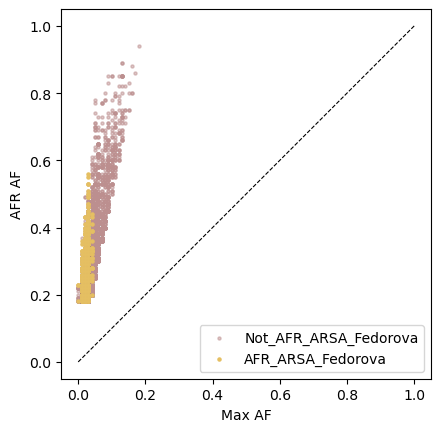

In [62]:
groups = specificAFR.groupby('fedorova_label')

# Color mapping for each group
color_mapping = {'AFR_ARSA_Fedorova': '#E5BF62', 'Not_AFR_ARSA_Fedorova': 'rosybrown'}

# Plot points for 'not_AFR_ARSA_Fedorova' group first
for name, group in groups:
    if name != 'AFR_ARSA_Fedorova':
        plt.scatter(
            group.maxFreqs,
            group.AFR_AF,
            label=name,
            marker='o',
            s=5,
            alpha=0.5,
            c=color_mapping.get(name, 'rosybrown')
        )

# Plot points for 'AFR_ARSA_Fedorova' group last with a higher zorder
adme_group = next(group for name, group in groups if name == 'AFR_ARSA_Fedorova')
plt.scatter(
    adme_group.maxFreqs,
    adme_group.AFR_AF,
    label='AFR_ARSA_Fedorova',
    marker='o',
    s=5,
    alpha=1,
    c=color_mapping.get('AFR_ARSA_Fedorova', '#e3e3e6'),
    zorder=10
)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Set axis limits to go from 0 to 1
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Add a diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', linewidth=0.8)

plt.legend()
plt.xlabel('Max AF')
plt.ylabel('AFR AF')
#plt.title('Specific to African populations')
plt.show()

#### Some numbers

In [82]:
# Whole dataset
print(data3.shape[0])
print(data3[data3['ADME_label']=='ADME'].shape[0])
print((data3[data3['ADME_label']=='ADME'].shape[0] / data3.shape[0]) * 100)
print(data3[data3['ADME_label']=='Not_ADME'].shape[0])
print((data3[data3['ADME_label']=='Not_ADME'].shape[0] / data3.shape[0]) * 100)
print(len(set(data3[data3['ADME_label']=='ADME']['ANN[*].GENE'])))
print((len(set(data3[data3['ADME_label']=='ADME']['ANN[*].GENE']))/len(set(data3['ANN[*].GENE'])))*100)
print(len(set(data3[data3['ADME_label']=='Not_ADME']['ANN[*].GENE'])))
print((len(set(data3[data3['ADME_label']=='Not_ADME']['ANN[*].GENE']))/len(set(data3['ANN[*].GENE'])))*100)

1905489
27213
1.4281373442722578
1878276
98.57186265572774
268
1.45763080604808
18118
98.54236919395191


In [81]:
# Abundant AFR
print(abundantAFR.shape[0])
print(abundantAFR[abundantAFR['ADME_label']=='ADME'].shape[0])
print((abundantAFR[abundantAFR['ADME_label']=='ADME'].shape[0] / abundantAFR.shape[0]) * 100)
print(abundantAFR[abundantAFR['ADME_label']=='Not_ADME'].shape[0])
print((abundantAFR[abundantAFR['ADME_label']=='Not_ADME'].shape[0] / abundantAFR.shape[0]) * 100)
print(len(set(abundantAFR[abundantAFR['ADME_label']=='ADME']['ANN[*].GENE'])))
print((len(set(abundantAFR[abundantAFR['ADME_label']=='ADME']['ANN[*].GENE']))/len(set(abundantAFR['ANN[*].GENE'])))*100)
print(len(set(abundantAFR[abundantAFR['ADME_label']=='Not_ADME']['ANN[*].GENE'])))
print((len(set(abundantAFR[abundantAFR['ADME_label']=='Not_ADME']['ANN[*].GENE']))/len(set(abundantAFR['ANN[*].GENE'])))*100)

71736
1135
1.5821902531504406
70601
98.41780974684956
235
1.552077141536226
14906
98.44792285846378


In [83]:
# Specific AFR
print(specificAFR.shape[0])
print(specificAFR[specificAFR['ADME_label']=='ADME'].shape[0])
print((specificAFR[specificAFR['ADME_label']=='ADME'].shape[0] / specificAFR.shape[0]) * 100)
print(specificAFR[specificAFR['ADME_label']=='Not_ADME'].shape[0])
print((specificAFR[specificAFR['ADME_label']=='Not_ADME'].shape[0] / specificAFR.shape[0]) * 100)
print(len(set(specificAFR[specificAFR['ADME_label']=='ADME']['ANN[*].GENE'])))
print((len(set(specificAFR[specificAFR['ADME_label']=='ADME']['ANN[*].GENE']))/len(set(specificAFR['ANN[*].GENE'])))*100)
print(len(set(specificAFR[specificAFR['ADME_label']=='Not_ADME']['ANN[*].GENE'])))
print((len(set(specificAFR[specificAFR['ADME_label']=='Not_ADME']['ANN[*].GENE']))/len(set(specificAFR['ANN[*].GENE'])))*100)

7865
111
1.4113159567705023
7754
98.5886840432295
57
1.400147383935151
4014
98.59985261606485


In [88]:
# Number of variants per ADME gene
print(27213/268)
print(1135/235)
print(111/57)

# Number of vcariants per not_ADME gene
print(1878276/18118)
print(70601/14906)
print(7754/4014)

101.5410447761194
4.829787234042553
1.9473684210526316
103.66905839496633
4.7364148664967125
1.931738913801694
